In [18]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import geopandas as gp

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy()

In [5]:
some_data = pd.read_csv("data.csv")

In [6]:
some_data.columns

Index([u'OBJECTID', u'FEATURETYPE', u'NAME', u'CAPACITY_kV', u'CLASSIFICATION',
       u'SITESUBURB', u'STATE', u'STATUS', u'FEATURERELIABILITY',
       u'FEATURESOURCE', u'ATTRIBUTERELIABILITY', u'ATTRIBUTESOURCE',
       u'SPATIALACCURACY', u'REVISED', u'LATITUDE', u'LONGITUDE'],
      dtype='object')

In [7]:
some_data.head(20)

,OBJECTID,FEATURETYPE,NAME,CAPACITY_kV,CLASSIFICATION,SITESUBURB,STATE,STATUS,FEATURERELIABILITY,FEATURESOURCE,ATTRIBUTERELIABILITY,ATTRIBUTESOURCE,SPATIALACCURACY,REVISED,LATITUDE,LONGITUDE
0,1,Substation,Bowen North,132,Terminal,Bowen,Queensland,Operational,20060704,East_Queensland_SPOT.ecw,20140627,Airservices Australia,5,20130812,-20.017831,148.167513
1,2,Substation,Clements Gap Wind Farm,132,Zone,Clements Gap,South Australia,Operational,20100101,ALPSM2P5_ZONE54_2010.ecw,20120712,AEMO-Australian Energy Market Operators 2012,3,20120710,-33.508265,138.130708
2,3,Substation,Snowtown Wind Farm,275,NaN,Cameron,South Australia,Operational,20100305,ESRI World Imagery,20100305,ESRI World Imagery,3,20130812,-33.830205,138.118460
3,4,Substation,Blyth West,275,Switchyard,Blyth,South Australia,Operational,20100305,ESRI World Imagery,20100305,ESRI World Imagery,3,20130812,-33.846902,138.407543
4,5,Substation,Belalie-North Brown Hill Wind Farm,275,NaN,Belalie East,South Australia,Operational,20070516,alav2p5_69574270_16052007.ecw,20120712,AEMO-Australian Energy Market Operators 2012,5,20120710,-33.309212,138.727294
5,6,Substation,West Angelas Mine,220,Power Station,Newman,Western Australia,Operational,20100609,ESRI World Imagery,20100609,ESRI World Imagery,5,20130812,-23.154106,118.725055
6,7,Substation,West Angelas Mine,220,Switchyard,Newman,Western Australia,Operational,20100609,ESRI World Imagery,20100609,ESRI World Imagery,5,20130812,-23.148954,118.719173
7,8,Substation,Blayney Wind Farm,132,Zone,Carcoar,New South Wales,Operational,20070101,Blayney_8730_50cm_2007.ecw,20001019,Airservices Australia,5,20131220,-33.628141,149.208199
8,9,Substation,Mumbida Wind Farm,132,Zone,Burma Road,Western Australia,Operational,20100902,ESRI World Imagery,20100902,ESRI World Imagery,3,20130812,-28.991805,114.959888
9,10,Substation,Redbank,132,Switchyard,Warkworth,New South Wales,Operational,20130214,AEMO-Australian Energy Market Operators 2013,20130214,AEMO-Australian Energy Market Operators 2013,5,20130730,-32.579544,151.072531


In [8]:
row1 = some_data.iloc[5]
row1

OBJECTID                                 6
FEATURETYPE                     Substation
NAME                     West Angelas Mine
CAPACITY_kV                            220
CLASSIFICATION               Power Station
SITESUBURB                          Newman
STATE                    Western Australia
STATUS                         Operational
FEATURERELIABILITY                20100609
FEATURESOURCE           ESRI World Imagery
ATTRIBUTERELIABILITY              20100609
ATTRIBUTESOURCE         ESRI World Imagery
SPATIALACCURACY                          5
REVISED                           20130812
LATITUDE                          -23.1541
LONGITUDE                          118.725
Name: 5, dtype: object

In [9]:
row1["SITESUBURB"]

'Newman'

In [10]:
some_data["NAME"]

0                             Bowen North
1                  Clements Gap Wind Farm
2                      Snowtown Wind Farm
3                              Blyth West
4      Belalie-North Brown Hill Wind Farm
5                       West Angelas Mine
6                       West Angelas Mine
7                       Blayney Wind Farm
8                       Mumbida Wind Farm
9                                 Redbank
10                               Manildra
11                                  Cadia
12                           Homebush Bay
13                               Hillston
14                                    Hay
15               Cullerin Range Wind Farm
16                      Gunning Wind Farm
17                            Brandy Hill
18                  Wellington Road-SSWRD
19                                Meadows
20                              Balhannah
21                               Harndorf
22                     Mount Barker South
23                            Stra

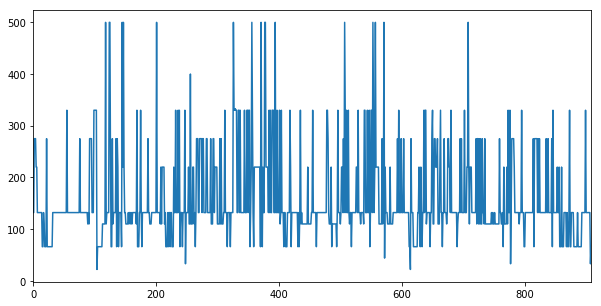

In [11]:
some_data["CAPACITY_kV"].plot()

OBJECTID                                       1
FEATURETYPE                           Substation
NAME                                 Bowen North
CAPACITY_kV                                  660
CLASSIFICATION                          Terminal
SITESUBURB                                 Bowen
STATE                                 Queensland
STATUS                               Operational
FEATURERELIABILITY                      20060704
FEATURESOURCE           East_Queensland_SPOT.ecw
ATTRIBUTERELIABILITY                    20140627
ATTRIBUTESOURCE            Airservices Australia
SPATIALACCURACY                                5
REVISED                                 20130812
LATITUDE                                -20.0178
LONGITUDE                                148.168
Name: 0, dtype: object
OBJECTID                                                           2
FEATURETYPE                                               Substation
NAME                                          Clements 

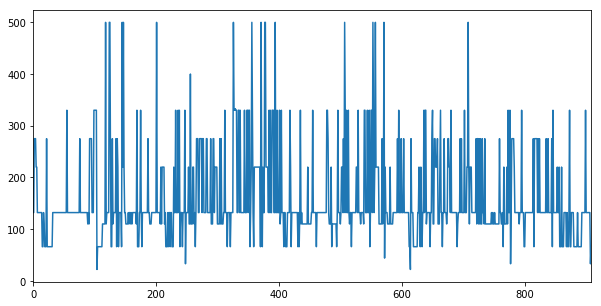

In [33]:
mdata = some_data
for index, row in mdata.iterrows():
    row["CAPACITY_kV"] = row["CAPACITY_kV"] * 5
    print(row)
mdata["CAPACITY_kV"].plot()

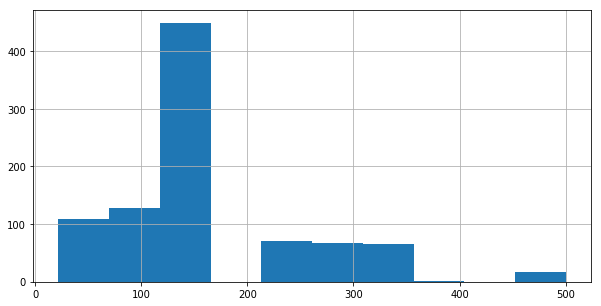

In [12]:
some_data["CAPACITY_kV"].hist()

<function matplotlib.pyplot.show>

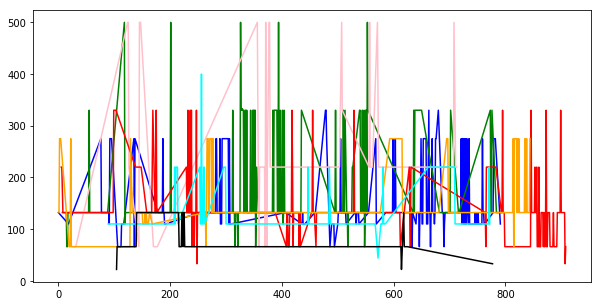

In [13]:
QLD = some_data["CAPACITY_kV"][some_data["STATE"] == "Queensland"]
NSW = some_data["CAPACITY_kV"][some_data["STATE"] == "New South Wales"]
VIC = some_data["CAPACITY_kV"][some_data["STATE"] == "Victoria"]
WA = some_data["CAPACITY_kV"][some_data["STATE"] == "Western Australia"]
SA = some_data["CAPACITY_kV"][some_data["STATE"] == "South Australia"]
TAS = some_data["CAPACITY_kV"][some_data["STATE"] == "Tasmania"]
NT = some_data["CAPACITY_kV"][some_data["STATE"] == "Northern Territory"]
ACT = some_data["CAPACITY_kV"][some_data["STATE"] == "Australian Capital Territory"]
plt.plot(QLD, color="blue")
plt.plot(NSW, color="green")
plt.plot(VIC, color="pink")
plt.plot(WA, color = "red")
plt.plot(SA, color = "orange")
plt.plot(TAS, color = "cyan")
plt.plot(NT, color = "black")
plt.show

In [14]:
some_data["STATE"][some_data["CAPACITY_kV"] == 500]

118    New South Wales
124           Victoria
125           Victoria
145           Victoria
147           Victoria
201    New South Wales
326    New South Wales
356           Victoria
371           Victoria
377           Victoria
378           Victoria
394    New South Wales
507           Victoria
553    New South Wales
557           Victoria
571           Victoria
708           Victoria
Name: STATE, dtype: object

In [15]:
at1 = 9
at2 = 4
att = at1 * at2
print(att)

36


In [16]:
d = {}
classes = []
states = []
for each in some_data["CLASSIFICATION"]:
    clas = each
    if clas not in classes:
        classes.append(clas)
for each in some_data["STATE"]:
    if each not in states:
        states.append(each)
for classy in classes:
    dd = {}
    for stat in states:
        count = 0
        for each in some_data["STATE"][some_data["STATE"] == stat][some_data["CLASSIFICATION"] == classy]:
            count += 1
            dd[stat] = count
    d[classy] = dd
d

{nan: {},
 'Bulk Supply Point': {'New South Wales': 7},
 'Power Station': {'New South Wales': 8,
  'Queensland': 10,
  'South Australia': 6,
  'Tasmania': 6,
  'Victoria': 7,
  'Western Australia': 6},
 'Sole Use': {'New South Wales': 2,
  'Queensland': 4,
  'South Australia': 1,
  'Western Australia': 20},
 'Subtransmission ': {'New South Wales': 25},
 'Switchyard': {'Australian Capital Territory': 2,
  'New South Wales': 3,
  'Queensland': 2,
  'South Australia': 1,
  'Tasmania': 1,
  'Western Australia': 3},
 'Terminal': {'Queensland': 1},
 'Terminal ': {'Australian Capital Territory': 1,
  'New South Wales': 18,
  'Queensland': 4,
  'Victoria': 43,
  'Western Australia': 27},
 'Transmission ': {'New South Wales': 19, 'Queensland': 8},
 'Zone': {'Australian Capital Territory': 11,
  'New South Wales': 7,
  'Queensland': 2},
 'Zone ': {'Australian Capital Territory': 2,
  'New South Wales': 127,
  'Northern Territory': 28,
  'Queensland': 188,
  'South Australia': 94,
  'Tasmania': 6

'hello'